**Importing and cleaning the data**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Import the data
ttdata = pd.read_csv('TexasTurbine.csv')
ttdata.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [ ]:
ttdata.columns
ttdata.shape

(8760, 6)

In [ ]:
# Check for missing values
print(ttdata.isna().sum())

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64


In [ ]:
# Cleaning the data
# Set timestamp as index and check for duplicates

# Convert 'Time stamp' to datetime and format it
ttdata['Time stamp'] = pd.to_datetime(ttdata['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%Y-%m-%d %H:%M:%S')

# Replace '1900' with '2021' in the 'Time stamp' column
ttdata['Time stamp'] = ttdata['Time stamp'].str.replace('1900', '2021')

# Convert 'Time stamp' back to datetime
ttdata['Time stamp'] = pd.to_datetime(ttdata['Time stamp'])

# Set the 'Time stamp' column as the index
ttdata.index = ttdata['Time stamp']

ttdata.drop('Time stamp', axis = 1, inplace = True)

# Display the first few rows of the dataframe
print(ttdata.head())

# Check for duplicates
print(ttdata.duplicated().sum())


                     System power generated | (kW)  Wind speed | (m/s)  \
Time stamp                                                               
2021-01-01 00:00:00                        1766.64               9.926   
2021-01-01 01:00:00                        1433.83               9.273   
2021-01-01 02:00:00                        1167.23               8.660   
2021-01-01 03:00:00                        1524.59               9.461   
2021-01-01 04:00:00                        1384.28               9.184   

                     Wind direction | (deg)  Pressure | (atm)  \
Time stamp                                                      
2021-01-01 00:00:00                     128          1.000480   
2021-01-01 01:00:00                     135          0.999790   
2021-01-01 02:00:00                     142          0.999592   
2021-01-01 03:00:00                     148          0.998309   
2021-01-01 04:00:00                     150          0.998507   

                     Air 

**Feature Engineering**

In [ ]:
# Extract the following information from date index: day of week, month, quarter, year and seasons

def extract_features(dataframe):
    """
    this function extracts date features from the index and also creates a season column
    """
    # Copy dataframe
    dataframe = dataframe.copy()
    dataframe['quarter'] = dataframe.index.quarter
    dataframe['month'] = dataframe.index.month
    dataframe['week'] = dataframe.index.isocalendar().week.astype(int)
    dataframe['hour'] = dataframe.index.hour

    return dataframe

def map_month_to_season(month):
    if 3 <= month <= 5:
      return 'Spring'
    elif 6 <= month <= 8:
      return 'Summer'
    elif 9 <= month <= 11:
      return 'Fall'
    else:
      return 'Winter'

In [ ]:
ttdata = extract_features(ttdata)
ttdata

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),quarter,month,week,hour
Time stamp,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21


In [ ]:
ttdata['season'] = ttdata['month'].apply(map_month_to_season)
ttdata

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19,Winter
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20,Winter
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21,Winter


In [ ]:
ttdata.dtypes

ttdata.columns

Index(['System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)',
       'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

In [ ]:
ttdata.columns = ['power_generated', 'wind_speed',
       'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season']

ttdata

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19,Winter
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20,Winter
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21,Winter


**Exploratory Data Analysis**

In [ ]:
# Univariates: power generated, wind speed, direction, temperature, pressure and season

# Multivariate:

<Axes: xlabel='power_generated', ylabel='Count'>

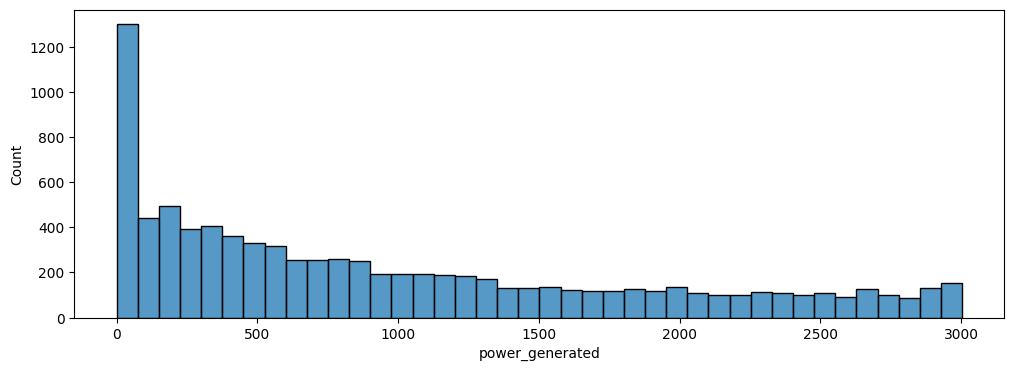

In [ ]:
# Visualizing the distribution for power generated

# Specify the plot size
plt.figure(figsize=(12, 4))

# Create a histogram
sns.histplot(ttdata['power_generated'], bins=40)

In [ ]:
ttdata.power_generated.describe()


count    8760.000000
mean      964.467934
std       878.558112
min         0.000000
25%       215.951500
50%       693.968500
75%      1562.287500
max      3004.010000
Name: power_generated, dtype: float64

In [ ]:
# Selecting null power generated rows
ttdata[ttdata['power_generated'] <= 0]

# power generated was 0 in 822 times

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-05 00:00:00,0.0,2.491,156,0.991694,20.263,1,1,1,0,Winter
2021-01-05 01:00:00,0.0,0.484,95,0.994162,19.963,1,1,1,1,Winter
2021-01-07 22:00:00,0.0,2.788,340,1.002560,10.863,1,1,1,22,Winter
2021-01-07 23:00:00,0.0,2.116,273,1.001870,11.963,1,1,1,23,Winter
2021-01-08 00:00:00,0.0,2.897,284,1.000980,12.063,1,1,1,0,Winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 23:00:00,0.0,2.748,241,0.997129,13.863,4,12,52,23,Winter
2021-12-28 00:00:00,0.0,2.135,271,0.996338,14.163,4,12,52,0,Winter
2021-12-28 01:00:00,0.0,2.076,246,0.996338,14.163,4,12,52,1,Winter


In [ ]:
ttdata[ttdata['power_generated'] <= 0]['season'].value_counts()

season
Fall      284
Winter    239
Summer    191
Spring    108
Name: count, dtype: int64

<ipython-input-117-261ed3154c3b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts, palette='viridis')


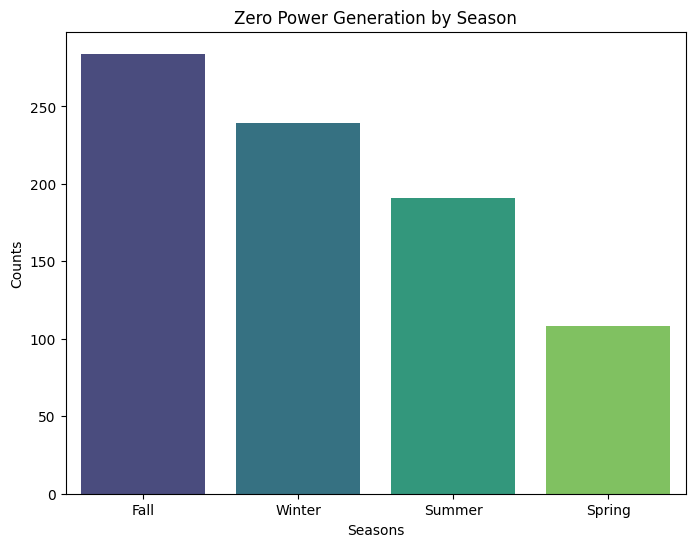

In [ ]:
# Barplot
season_counts = ttdata[ttdata['power_generated'] <= 0]['season'].value_counts()

plt.figure(figsize = (8, 6))
sns.barplot(x=season_counts.index, y=season_counts, palette='viridis')

plt.title('Zero Power Generation by Season')
plt.xlabel('Seasons')
plt.ylabel('Counts')

plt.show()

<Axes: ylabel='power_generated'>

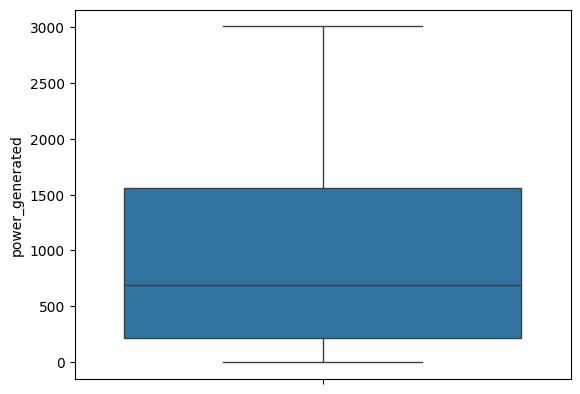

In [ ]:
# Power generated

sns.boxplot(ttdata['power_generated'])

**There are no outliers in the power generation column**

<Axes: xlabel='wind_speed', ylabel='Count'>

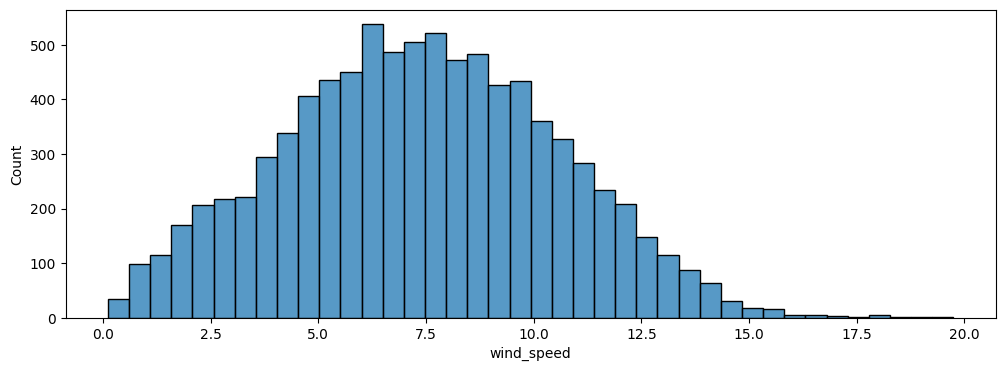

In [ ]:
# Checking for the distribution of wind speed
plt.figure(figsize=(12, 4))
sns.histplot(ttdata['wind_speed'], bins=40)

**Wind speed is normally distributed**

<Axes: ylabel='wind_dir'>

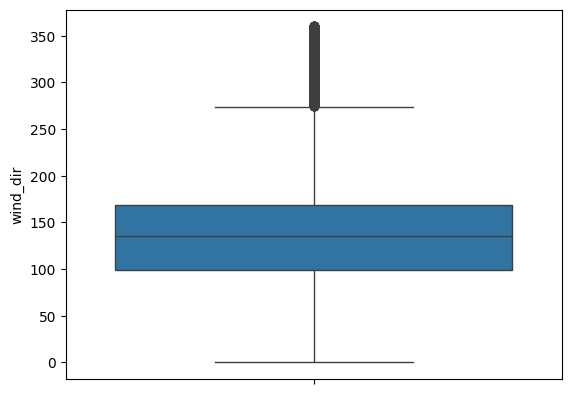

In [ ]:
sns.boxplot(ttdata['wind_dir'])
# Severity is not to large

**A number of outliers are present with consecutive values**

<Axes: xlabel='wind_dir', ylabel='Count'>

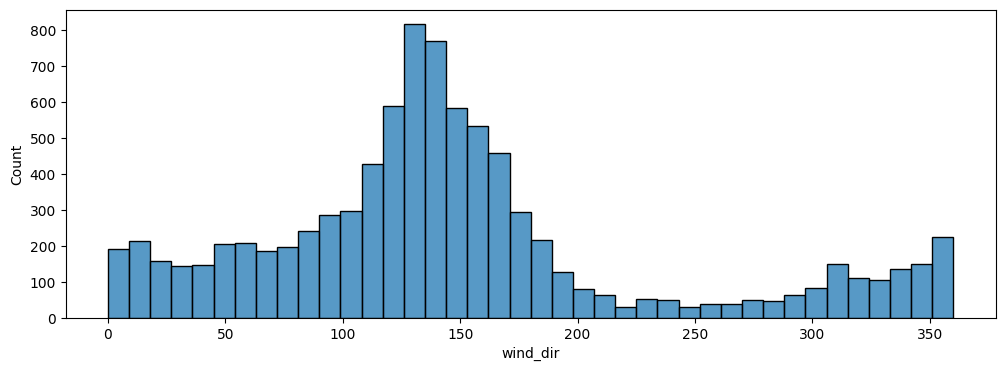

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(ttdata['wind_dir'], bins = 40)

**Distribution of wind direction is almost binomial**

<Axes: xlabel='pressure', ylabel='Count'>

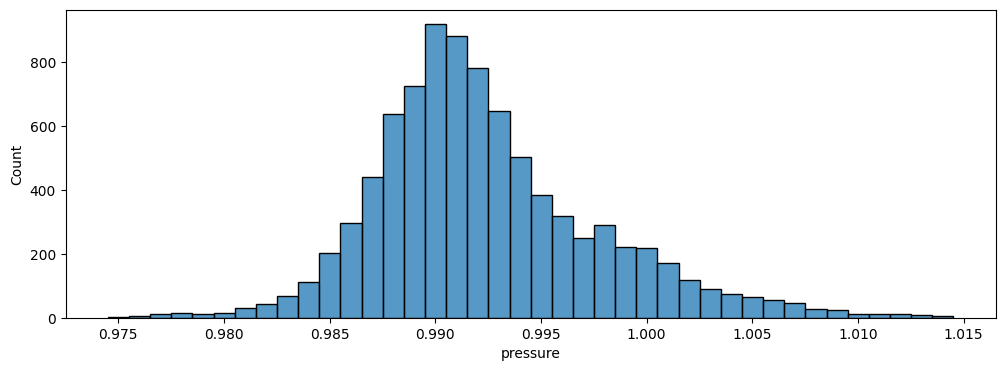

In [ ]:
# Showing the distribution of pressure values
plt.figure(figsize=(12, 4))
sns.histplot(ttdata['pressure'], bins = 40)

<Axes: xlabel='temperature', ylabel='Count'>

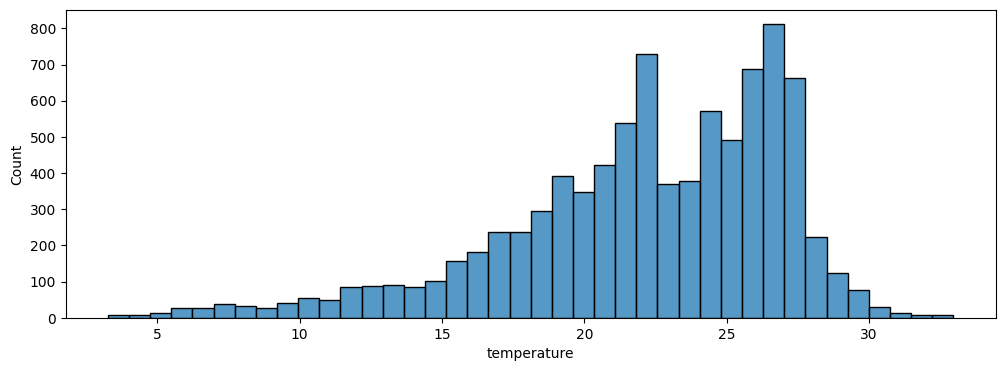

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(ttdata['temperature'], bins = 40)

**Temperature is skewed which could be due to various seasons**

<Axes: xlabel='temperature', ylabel='pressure'>

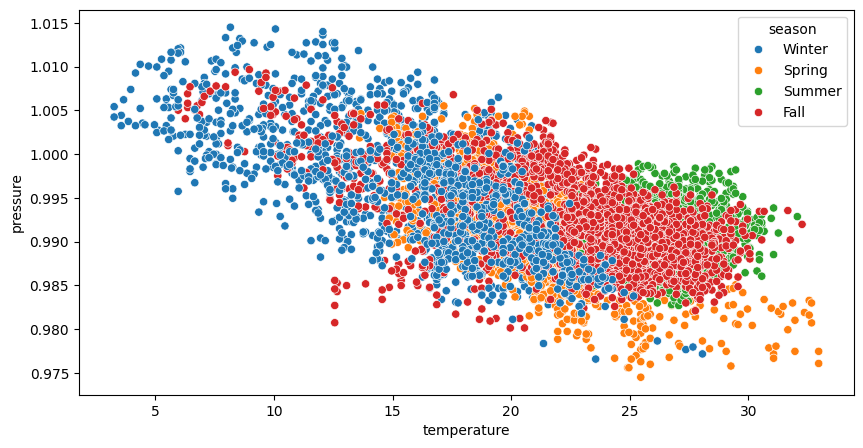

In [ ]:
# Multivariate EDA

# Temperature vs Pressure

plt.figure(figsize=(10, 5))
sns.scatterplot(data = ttdata, x='temperature', y='pressure', hue='season')

winter: colder days, less than 20

spring: high temperature at low pressure,low pressure at high temperature

summer: high temperature

fall: widest range of temperature and pressure

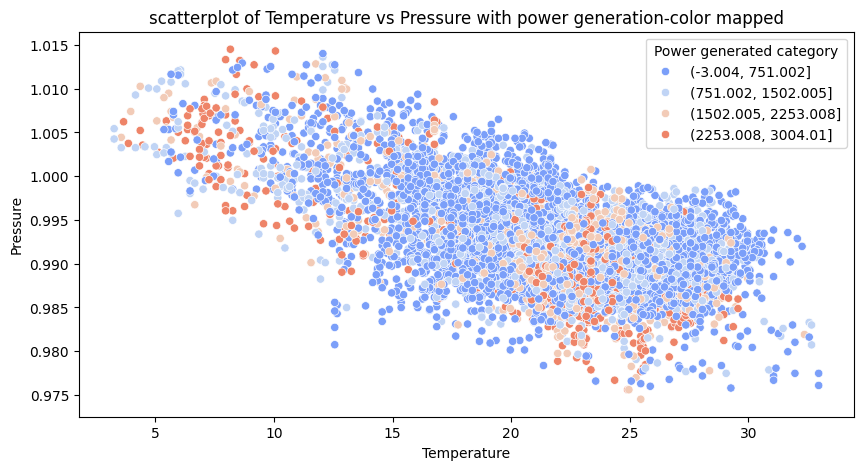

In [ ]:

num_bins = 4
binned_ttdata = pd.cut(ttdata['power_generated'], bins=num_bins)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=ttdata, x='temperature', y='pressure', hue=binned_ttdata, palette='coolwarm')
plt.title('scatterplot of Temperature vs Pressure with power generation-color mapped')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(title='Power generated category', loc='upper right')
plt.show()

<Axes: xlabel='season', ylabel='power_generated'>

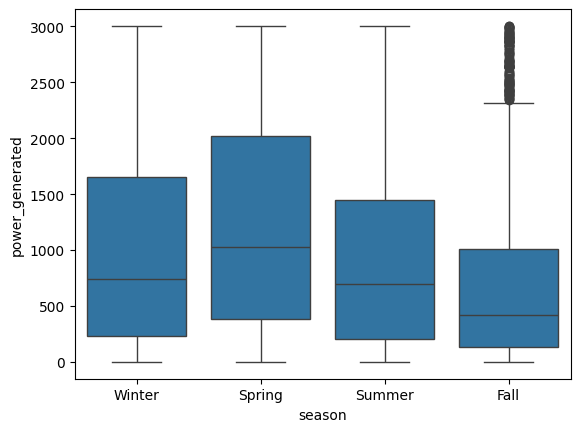

In [ ]:
# Observe the effects of season on power generated

sns.boxplot(data=ttdata, y='power_generated', x='season')

<Axes: xlabel='season', ylabel='wind_speed'>

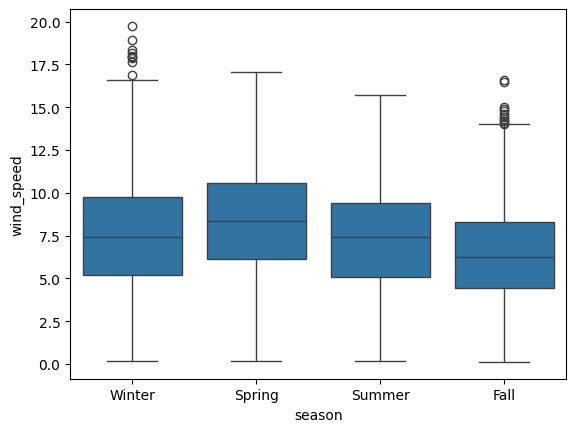

In [ ]:
# Wind characteristics

sns.boxplot(data=ttdata, x='season', y='wind_speed')


<Axes: xlabel='month', ylabel='power_generated'>

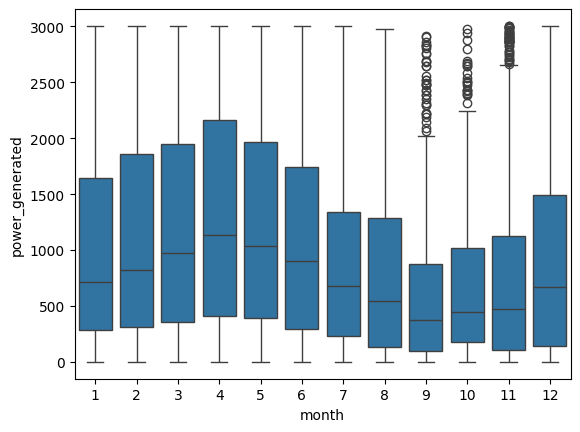

In [ ]:
# month and power generated
sns.boxplot(data=ttdata, x='month', y='power_generated')

Cyclical pattern emerges when the power generated is observed through the months probably pointing to season

<Axes: xlabel='month', ylabel='wind_speed'>

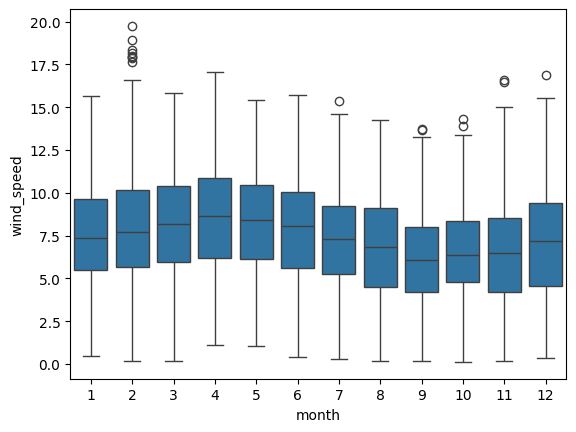

In [ ]:
# month and wind speed
sns.boxplot(data=ttdata, x='month', y='wind_speed')

Pattern follows that of power generated vs months

<Axes: xlabel='wind_speed', ylabel='power_generated'>

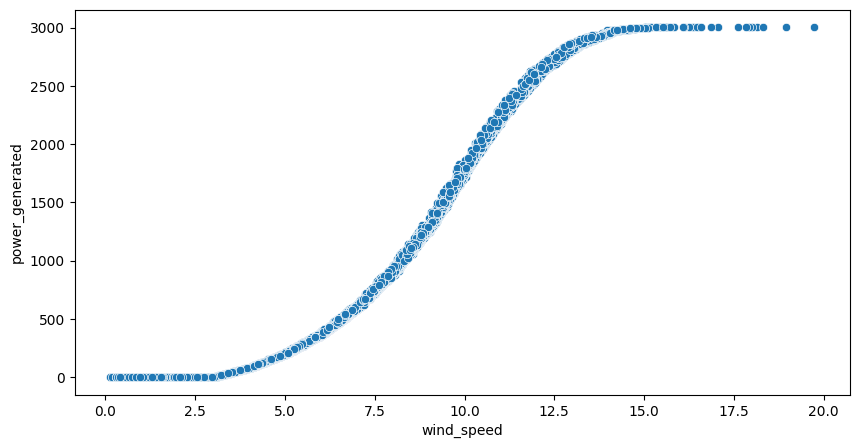

In [ ]:
# Scatterplot for wind speed vs power generated

plt.figure(figsize=(10, 5))
sns.scatterplot(data=ttdata, x='wind_speed', y='power_generated')

**Power generation curve**

power is not generated at a wind speed less than 2.5

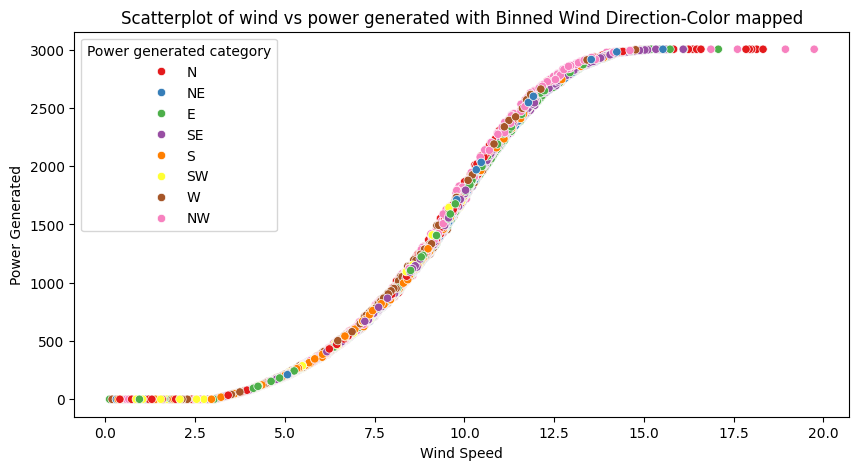

In [ ]:
ttdata['wind_dir']

bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

bin_edges = [-1, 45, 90, 135, 180, 225, 270, 315, 360]

binned_data = pd.cut(ttdata['wind_dir'], bins=bin_edges, labels=bin_labels)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=ttdata, x='wind_speed', y='power_generated', hue=binned_data, palette='Set1')

plt.title('Scatterplot of wind vs power generated with Binned Wind Direction-Color mapped')
plt.xlabel('Wind Speed')
plt.ylabel('Power Generated')
plt.legend(title='Power generated category')
plt.show()


<Axes: xlabel='wind_dir', ylabel='power_generated'>

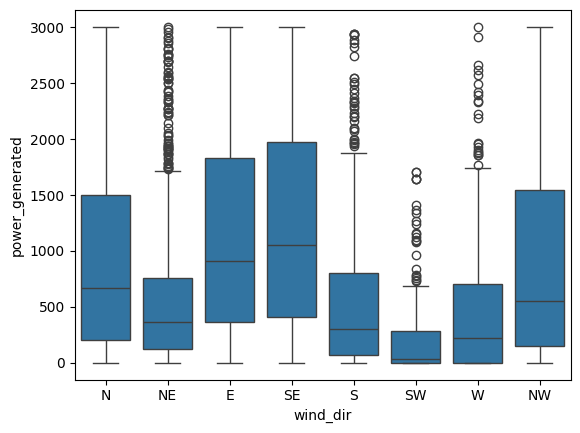

In [ ]:
sns.boxplot(x=binned_data, y=ttdata['power_generated'])

In [ ]:
ttdata['wind_orientation'] = binned_data

**ENCODING AND MODELLING**

In [ ]:
ttdata.head(10)

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season,wind_orientation
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.640,9.926,128,1.000480,18.263,1,1,53,0,Winter,E
2021-01-01 01:00:00,1433.830,9.273,135,0.999790,18.363,1,1,53,1,Winter,E
2021-01-01 02:00:00,1167.230,8.660,142,0.999592,18.663,1,1,53,2,Winter,SE
2021-01-01 03:00:00,1524.590,9.461,148,0.998309,18.763,1,1,53,3,Winter,SE
2021-01-01 04:00:00,1384.280,9.184,150,0.998507,18.963,1,1,53,4,Winter,SE
2021-01-01 05:00:00,1293.930,8.996,149,0.998507,19.063,1,1,53,5,Winter,SE
2021-01-01 06:00:00,1301.630,9.016,151,0.998211,19.113,1,1,53,6,Winter,SE
2021-01-01 07:00:00,1308.130,9.036,154,0.997815,19.163,1,1,53,7,Winter,SE
2021-01-01 08:00:00,792.081,7.612,154,1.000280,19.363,1,1,53,8,Winter,SE


In [ ]:
print(len(ttdata) * 0.3)

2628.0


In [ ]:
train_data = ttdata[:-2628]
test_data = ttdata[-2628:]

In [ ]:
# Perform mean encoding for mean
season_mean = train_data.groupby('season')['power_generated'].mean()
ttdata['season_mean_encoded'] = ttdata['season'].map(season_mean)

In [ ]:
# Perform mean encoding for orientation
wind_mean = train_data.groupby('wind_orientation')['power_generated'].mean()
ttdata['wind_orientation_mean_encoded'] = ttdata['wind_orientation'].map(wind_mean)
ttdata.head()

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season,wind_orientation,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter,E,1058.753692,1214.650349
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter,E,1058.753692,1214.650349
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter,SE,1058.753692,1248.372613
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter,SE,1058.753692,1248.372613
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter,SE,1058.753692,1248.372613


In [ ]:
ttdata.drop(['season', 'wind_orientation'], axis=1, inplace=True)
ttdata

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,1058.753692,1214.650349
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,1058.753692,1214.650349
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,1058.753692,1248.372613
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,1058.753692,1248.372613
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,1058.753692,1248.372613
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19,1058.753692,1214.650349
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20,1058.753692,1214.650349
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21,1058.753692,1214.650349


In [ ]:
train_data = ttdata[:-2628]
test_data = ttdata[-2628:]

train_data

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,1058.753692,1214.650349
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,1058.753692,1214.650349
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,1058.753692,1248.372613
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,1058.753692,1248.372613
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,1058.753692,1248.372613
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13 07:00:00,0.00,1.513,239,0.993169,26.863,3,9,37,7,867.021622,250.053972
2021-09-13 08:00:00,0.00,1.770,276,0.991688,27.563,3,9,37,8,867.021622,489.797900
2021-09-13 09:00:00,0.00,1.977,328,0.992971,29.063,3,9,37,9,867.021622,855.516311


In [ ]:
#Modelling
#linear models: linear regression
#support vector machine: sdr
#Ensemble: rf, gbr

#imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Selecting the train and test values

target = 'power_generated'
features = ['wind_speed', 'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season_mean_encoded',
       'wind_orientation_mean_encoded']


X_test = test_data[features]
y_test = test_data[target]
X_train = train_data[features]
y_train = train_data[target]

In [ ]:
# Linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random forest regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Support vector machine
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Gradient boosting regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)




GradientBoostingRegressor()

In [ ]:
# Making predictions with models
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

In [ ]:
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

print("Linear Regression MSE:", lr_mse)
print("Random Forest MSE:", rf_mse)
print("Support Vector Machine MSE:", svm_mse)
print("Gradient Boosting MSE:", gb_mse)

Linear Regression MSE: 80965.27593634969
Random Forest MSE: 134.4658032886318
Support Vector Machine MSE: 608393.4168488852
Gradient Boosting MSE: 70.04457882528011


In [ ]:
lr_mse = mean_absolute_error(y_test, lr_predictions)
rf_mse = mean_absolute_error(y_test, rf_predictions)
svm_mse = mean_absolute_error(y_test, svm_predictions)
gb_mse = mean_absolute_error(y_test, gb_predictions)

print("Linear Regression MAE:", lr_mse)
print("Random Forest MAE:", rf_mse)
print("Support Vector Machine MAE:", svm_mse)
print("Gradient Boosting MAE:", gb_mse)

Linear Regression MAE: 228.93177190271575
Random Forest MAE: 5.425810861719929
Support Vector Machine MAE: 620.6563659850767
Gradient Boosting MAE: 5.727416866411625


In [ ]:
#rf and gb were has an error of roughly 0.6 percent,
#this makes them the best models for hyperparameter tuning



**Hyperparameter Tuning using Hyperopt and Bayesian Optimization**

In [ ]:
X_val = X_train[-1200:]
y_val = y_train[-1200:]

X_train = X_train[:-1200]
y_train = y_train[:-1200]



In [ ]:
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

# Create a space
space = {'n_estimators':  hp.quniform('n_estimators', 100, 300, 1), \
         'max_depth': hp.quniform('max_depth', 5, 20, 1), \
         'max_features': hp.choice('max_features', ['sqrt', 'log2', None])}

# Objective ==> sample from this space, create a random forest model,
# Evaluate the model, loss/mse

def objective(params):
  n_estimators = int(params['n_estimators'])
  max_depth = int(params['max_depth'])
  max_features = params['max_features']

  rf_model = RandomForestRegressor(n_estimators=n_estimators,\
                                   max_depth=max_depth, max_features=max_features,\
                                   random_state=42)

  rf_model.fit(X_train, y_train)
  predictions = rf_model.predict(X_val)

  mse = mean_squared_error(y_val, predictions)
  return {'loss': mse, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, verbose=1)

print("Best Hyperparameters:", best)


100%|██████████| 100/100 [06:53<00:00,  4.13s/trial, best loss: 27.809659947082157]
Best Hyperparameters: {'max_depth': 15.0, 'max_features': 2, 'n_estimators': 257.0}


In [ ]:
# Create a space
space = {'n_estimators':  hp.quniform('n_estimators', 100, 300, 1), \
         'max_depth': hp.quniform('max_depth', 5, 20, 1), \
         'learning_rate': hp.loguniform('learning_rate', -5, 0), \
         'subsample': hp.uniform('subsample', 0.1, 1.0)}

# Objective ==> sample from this space, create a random forest model,
# Evaluate the model, loss/mse

def objective(params):
  n_estimators = int(params['n_estimators'])
  max_depth = int(params['max_depth'])
  subsample=params['subsample']

  gb_model = GradientBoostingRegressor(n_estimators=n_estimators,\
                                   max_depth=max_depth, \
                                       learning_rate=params['learning_rate'],\
                                       subsample=params['subsample'],\
                                   random_state=42)

  gb_model.fit(X_train, y_train)
  predictions = gb_model.predict(X_val)
  mse = mean_squared_error(y_val, predictions)

  return {'loss': mse, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, verbose=1)

print("Best Hyperparameters:", best)

100%|██████████| 100/100 [04:50<00:00,  2.90s/trial, best loss: 6.591900247895257]
Best Hyperparameters: {'learning_rate': 0.028100696433820647, 'max_depth': 19.0, 'n_estimators': 298.0, 'subsample': 0.23174067502005627}


In [ ]:
train_data = ttdata[:-2628]
test_data = ttdata[-2628:]

# Selecting the train and test values

target = 'power_generated'
features = ['wind_speed', 'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season_mean_encoded',
       'wind_orientation_mean_encoded']


X_test = test_data[features]
y_test = test_data[target]
X_train = train_data[features]
y_train = train_data[target]

In [ ]:
best_rf_hyperparameters: {'max_depth': 15.0, 'max_features': 2, 'n_estimators': 249.0}

best_gb_hyperparameters: {'learning_rate': 0.040735925252861384,'max_depth': 17.0, 'n_estimators': 186.0, 'subsample': 0.17949030795348947}

In [ ]:
rf_model = RandomForestRegressor(n_estimators=241,\
                                   max_depth=15, max_features=2,\
                                   random_state=42)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print("Random Forest MSE:", rf_mse)
print("Random Forest MAE:", rf_mae)


Random Forest MSE: 73452.0203733416
Random Forest MAE: 187.5849427888616


In [ ]:
# Overfitting sensed

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=186, \
                                     learning_rate= 0.040735925252861384,\
                                   max_depth=17, subsample= 0.17949030795348947,\
                                   random_state=42)

gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

print("Gradient Boosting Regressor MSE:", gb_mse)
print("Gradient Boosting Regressor MAE:", gb_mae)

Gradient Boosting Regressor MSE: 64.73475269524853
Gradient Boosting Regressor MAE: 4.1611260107628505


BEST PERFORMING MODEL: GRADIENT BOOSTING REGRESSOR USING THE BEST HYPERPARAMETERS


In [ ]:
ttdata = pd.read_csv('TexasTurbine.csv')

features = ttdata.sample(10)

features

features.columns = ['Time stamp', 'power_generated', 'wind_speed', 'wind_dir',
                   'pressure', 'temperature']

targets = features['power_generated']

features.drop('power_generated', axis=1, inplace=True)

features

,Time stamp,wind_speed,wind_dir,pressure,temperature
4356,"Jul 1, 12:00 pm",4.370,318,0.991886,27.963
5825,"Aug 31, 05:00 pm",7.939,121,0.986654,27.663
6172,"Sep 15, 04:00 am",5.309,130,0.989023,27.663
2161,"Apr 1, 01:00 am",7.345,191,0.990804,22.063
6358,"Sep 22, 10:00 pm",6.535,127,0.992480,25.963
4186,"Jun 24, 10:00 am",7.859,123,0.988826,26.563
5564,"Aug 20, 08:00 pm",5.516,143,0.990109,27.163
2164,"Apr 1, 04:00 am",6.584,194,0.989521,21.963
3383,"May 21, 11:00 pm",5.922,115,0.994160,22.263
7068,"Oct 22, 12:00 pm",1.928,309,0.998701,22.063


In [ ]:
def fix_timestamp(df):
  # Set timestamp as index

  # Convert 'Time stamp' to datetime and format it
  df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%Y-%m-%d %H:%M:%S')

  # Replace '1900' with '2021' in the 'Time stamp' column
  df['Time stamp'] = df['Time stamp'].str.replace('1900', '2021')

  # Convert 'Time stamp' back to datetime
  df['Time stamp'] = pd.to_datetime(df['Time stamp'])

  # Set the 'Time stamp' column as the index
  df.index = df['Time stamp']

  df.drop('Time stamp', axis = 1, inplace = True)

  # Display the first few rows of the dataframe
  print(df.head())

  return df



In [ ]:
fix_timestamp(features)

                     wind_speed  wind_dir  pressure  temperature
Time stamp                                                      
2021-07-28 17:00:00       7.069       138  0.989714       26.963
2021-05-16 05:00:00       6.129       145  0.987150       23.963
2021-09-04 19:00:00       9.293        73  0.988234       27.263
2021-06-04 09:00:00       7.415       135  0.993171       24.963
2021-01-24 15:00:00       9.787       151  0.984783       22.263


,wind_speed,wind_dir,pressure,temperature
Time stamp,,,,
2021-07-28 17:00:00,7.069,138,0.989714,26.963
2021-05-16 05:00:00,6.129,145,0.987150,23.963
2021-09-04 19:00:00,9.293,73,0.988234,27.263
2021-06-04 09:00:00,7.415,135,0.993171,24.963
2021-01-24 15:00:00,9.787,151,0.984783,22.263
2021-12-31 18:00:00,9.234,128,0.998308,20.063
2021-10-15 23:00:00,8.729,143,0.989321,25.763
2021-06-30 18:00:00,5.230,142,0.988924,27.963
2021-10-28 22:00:00,10.519,125,0.996133,24.463


In [ ]:
features = extract_features(features)
features['season'] = features['month'].apply(map_month_to_season)
features

,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,
2021-07-28 17:00:00,7.069,138,0.989714,26.963,3,7,30,17,Summer
2021-05-16 05:00:00,6.129,145,0.987150,23.963,2,5,19,5,Spring
2021-09-04 19:00:00,9.293,73,0.988234,27.263,3,9,35,19,Fall
2021-06-04 09:00:00,7.415,135,0.993171,24.963,2,6,22,9,Summer
2021-01-24 15:00:00,9.787,151,0.984783,22.263,1,1,3,15,Winter
2021-12-31 18:00:00,9.234,128,0.998308,20.063,4,12,52,18,Winter
2021-10-15 23:00:00,8.729,143,0.989321,25.763,4,10,41,23,Fall
2021-06-30 18:00:00,5.230,142,0.988924,27.963,2,6,26,18,Summer
2021-10-28 22:00:00,10.519,125,0.996133,24.463,4,10,43,22,Fall


In [ ]:
def binned_wind_dir(df):
  bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

  bin_edges = [-1, 45, 90, 135, 180, 225, 270, 315, 360]

  binned_data = pd.cut(df['wind_dir'], bins=bin_edges, labels=bin_labels)

  df['wind_orientation'] = binned_data

  return df




In [ ]:
features = binned_wind_dir(features)
features

,Time stamp,wind_speed,wind_dir,pressure,temperature,wind_orientation
4356,"Jul 1, 12:00 pm",4.370,318,0.991886,27.963,NW
5825,"Aug 31, 05:00 pm",7.939,121,0.986654,27.663,E
6172,"Sep 15, 04:00 am",5.309,130,0.989023,27.663,E
2161,"Apr 1, 01:00 am",7.345,191,0.990804,22.063,S
6358,"Sep 22, 10:00 pm",6.535,127,0.992480,25.963,E
4186,"Jun 24, 10:00 am",7.859,123,0.988826,26.563,E
5564,"Aug 20, 08:00 pm",5.516,143,0.990109,27.163,SE
2164,"Apr 1, 04:00 am",6.584,194,0.989521,21.963,S
3383,"May 21, 11:00 pm",5.922,115,0.994160,22.263,E
7068,"Oct 22, 12:00 pm",1.928,309,0.998701,22.063,W


In [ ]:
def mean_encode(data, season_mean=season_mean, wind_mean=wind_mean):
  data['season_mean_encoded'] = data['season'].map(season_mean)
  data['wind_orientation_mean_encoded'] = data['wind_orientation'].map(wind_mean)

  data.drop(['season', 'wind_orientation'], axis=1, inplace=True)

  return data

In [ ]:
features = mean_encode(features)
features

,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,
2021-07-28 17:00:00,7.069,138,0.989714,26.963,3,7,30,17,927.663718,1248.372613
2021-05-16 05:00:00,6.129,145,0.987150,23.963,2,5,19,5,1221.768942,1248.372613
2021-09-04 19:00:00,9.293,73,0.988234,27.263,3,9,35,19,867.021622,597.096607
2021-06-04 09:00:00,7.415,135,0.993171,24.963,2,6,22,9,927.663718,1214.650349
2021-01-24 15:00:00,9.787,151,0.984783,22.263,1,1,3,15,1058.753692,1248.372613
2021-12-31 18:00:00,9.234,128,0.998308,20.063,4,12,52,18,1058.753692,1214.650349
2021-10-15 23:00:00,8.729,143,0.989321,25.763,4,10,41,23,867.021622,1248.372613
2021-06-30 18:00:00,5.230,142,0.988924,27.963,2,6,26,18,927.663718,1248.372613
2021-10-28 22:00:00,10.519,125,0.996133,24.463,4,10,43,22,867.021622,1214.650349


In [ ]:
gb_model.predict(features)

array([ 599.95099144,  386.01757202, 1379.58752541,  709.94063466,
       1647.57622147, 1389.43026254, 1155.19989181,  227.39045651,
       1989.08393748,  568.49874141])

In [ ]:
targets

5009     599.045
3245     385.865
5923    1378.930
3705     709.516
567     1647.660
8754    1402.680
6911    1156.060
4338     227.057
7222    1997.770
3869     568.455
Name: power_generated, dtype: float64

In [ ]:
def inference(features, model = gb_model):
  features = fix_timestamp(features)
  features = extract_features(features)
  features['season'] = features['month'].apply(map_month_to_season)
  features = binned_wind_dir(features)
  features = mean_encode(features)
  predictions = model.predict(features)

  return predictions



In [ ]:
inference(features)

                     wind_speed  wind_dir  pressure  temperature  \
Time stamp                                                         
2021-07-01 12:00:00       4.370       318  0.991886       27.963   
2021-08-31 17:00:00       7.939       121  0.986654       27.663   
2021-09-15 04:00:00       5.309       130  0.989023       27.663   
2021-04-01 01:00:00       7.345       191  0.990804       22.063   
2021-09-22 22:00:00       6.535       127  0.992480       25.963   

                    wind_orientation  
Time stamp                            
2021-07-01 12:00:00               NW  
2021-08-31 17:00:00                E  
2021-09-15 04:00:00                E  
2021-04-01 01:00:00                S  
2021-09-22 22:00:00                E  


array([1.17902145e+02, 8.60343621e+02, 2.40855766e+02, 6.92560629e+02,
       4.76410422e+02, 8.39636811e+02, 2.76563804e+02, 4.95374024e+02,
       3.53111353e+02, 5.00087855e-01])

In [ ]:
ttdata = pd.read_csv('TexasTurbine.csv')

features = ttdata.sample(1)

features

features.columns = ['Time stamp', 'power_generated', 'wind_speed', 'wind_dir',
                   'pressure', 'temperature']

targets = features['power_generated']

features.drop('power_generated', axis=1, inplace=True)

features

,Time stamp,wind_speed,wind_dir,pressure,temperature
2616,"Apr 20, 12:00 am",8.977,129,0.991891,20.263


In [ ]:
inference(features)

            wind_speed  wind_dir  pressure  temperature
Time stamp                                             
2021-04-20       8.977       129  0.991891       20.263


array([1273.5218735])

In [ ]:
targets

2616    1274.24
Name: power_generated, dtype: float64